# Stock Market/ Cryto Currency Prediction using Neural Networks
#### Name: Ashwaq Khazi

### Importing all necessary librabries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas_datareader as pdr
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
company = 'BTC-USD'
start='2011-1-1'
end='2021-1-1'
data = pdr.get_data_yahoo(company,start=start,end=end)
data.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2014-09-16,468.174011,452.421997,465.864014,457.334015,21056800.0,457.334015
2014-09-17,456.859985,413.104004,456.859985,424.440002,34483200.0,424.440002
2014-09-18,427.834991,384.532013,424.102997,394.795990,37919700.0,394.795990
2014-09-19,423.295990,389.882996,394.673004,408.903992,36863600.0,408.903992
2014-09-20,412.425995,393.181000,408.084991,398.821014,26580100.0,398.821014


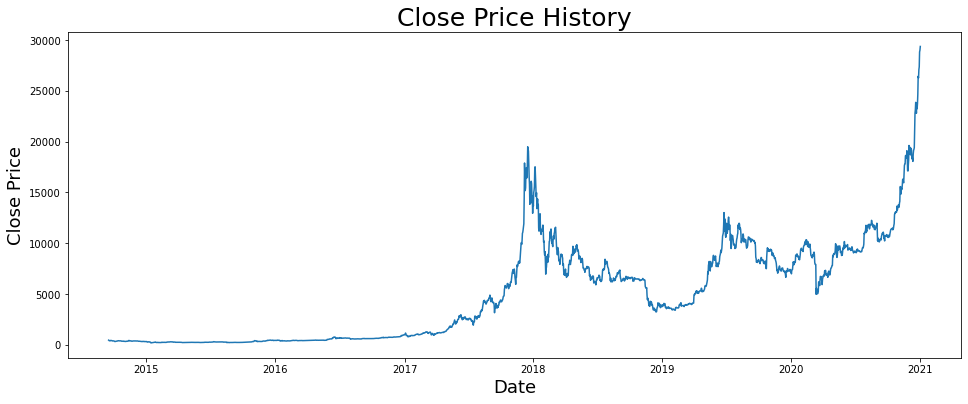

In [3]:
plt.figure(figsize=(16,6))
plt.title('Close Price History', fontsize=25)
plt.plot(data['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price', fontsize=18)
plt.show()

### Scale the closing prices to a number between 0 and 1

In [4]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scale_dt = scaler.fit_transform(data['Close'].values.reshape(-1,1))

scale_dt

array([[0.009564  ],
       [0.00843734],
       [0.007422  ],
       ...,
       [0.98173728],
       [0.98724377],
       [1.        ]])

### Model will train for 60 days and is going to predict for the 61st day

In [5]:
prediction_days = 60

x_train, y_train = [], []

for i in range(prediction_days, len(scale_dt)):
    x_train.append(scale_dt[i-prediction_days:i, 0])
    y_train.append(scale_dt[i, 0])

        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))


### Train Sequencial model using LSTM, Dropout(To avoid overfitting) and Dense layers

In [6]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential()

model.add(LSTM(64, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(32, return_sequences=True))
model.add(Dropout(0.2))
          
model.add(LSTM(16, return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, batch_size=32, epochs=25)


Epoch 1/25
70/70 [==============================] - 5s 71ms/step - loss: 0.0048
Epoch 2/25
70/70 [==============================] - 5s 65ms/step - loss: 0.0022
Epoch 3/25
70/70 [==============================] - 5s 65ms/step - loss: 0.0023
Epoch 4/25
70/70 [==============================] - 4s 64ms/step - loss: 0.0017
Epoch 5/25
70/70 [==============================] - 4s 64ms/step - loss: 0.0017
Epoch 6/25
70/70 [==============================] - 5s 65ms/step - loss: 0.0018
Epoch 7/25
70/70 [==============================] - 4s 63ms/step - loss: 0.0014
Epoch 8/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0014
Epoch 9/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0015
Epoch 10/25
70/70 [==============================] - 4s 63ms/step - loss: 0.0013
Epoch 11/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0014
Epoch 12/25
70/70 [==============================] - 4s 62ms/step - loss: 0.0012
Epoch 13/25
70/70 [==================

### Test data will be from Jan 2021 till today

In [15]:
test_dt = pdr.get_data_yahoo(company,start='2021-1-1',end=datetime.now())
test_dt.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-12-31,29244.876953,28201.992188,28841.574219,29001.720703,46754964848,29001.720703
2021-01-01,29600.626953,28803.585938,28994.009766,29374.152344,40730301359,29374.152344
2021-01-02,33155.117188,29091.181641,29376.455078,32127.267578,67865420765,32127.267578
2021-01-03,34608.558594,32052.316406,32129.408203,32782.023438,78665235202,32782.023438
2021-01-04,33440.218750,28722.755859,32810.949219,31971.914062,81163475344,31971.914062


In [16]:
actual = test_dt['Close'].values

In [17]:
total_dt= pd.concat((data['Close'], test_dt['Close']), axis=0)
total_dt

Date
2014-09-16      457.334015
2014-09-17      424.440002
2014-09-18      394.795990
2014-09-19      408.903992
2014-09-20      398.821014
                  ...     
2021-06-14    40406.269531
2021-06-15    38347.062500
2021-06-16    38053.503906
2021-06-17    35787.246094
2021-06-19    35580.125000
Name: Close, Length: 2466, dtype: float64

In [18]:
inputs = total_dt[len(total_dt) - len(test_dt)-prediction_days:].values
inputs = inputs.reshape(-1,1)
inputs = scaler.transform(inputs)

In [19]:
x_test = []

for i in range(prediction_days, len(inputs)):
    x_test.append(inputs[i-prediction_days:i, 0])
    
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

predicted = model.predict(x_test)
predicted = scaler.inverse_transform(predicted)

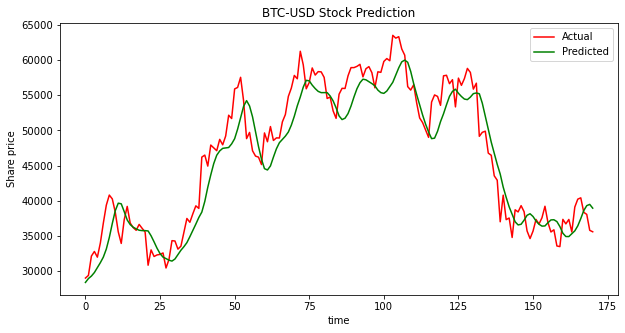

In [20]:
plt.figure(figsize=(10,5))
plt.plot(actual,color='red', label='Actual')
plt.plot(predicted,color='green', label='Predicted')
plt.legend()
plt.title("{} Stock Prediction".format(company))
plt.xlabel('time')
plt.ylabel('Share price')
plt.show()

In [21]:
real_dt = [inputs[len(inputs)+1-prediction_days:len(inputs)+1, 0]]
real_dt = np.array(real_dt)
real_dt = np.reshape(real_dt, (real_dt.shape[0], real_dt.shape[1], 1))

In [22]:
pred = model.predict(real_dt)
pred = scaler.inverse_transform(pred)
print("{} will be the closing price for tomorrow".format(pred))

[[37953.086]] will be the closing price for tomorrow
